In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(17,5)

In [2]:
df=pd.read_csv('BAJFINANCE.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
df.set_index('Date',inplace=True)

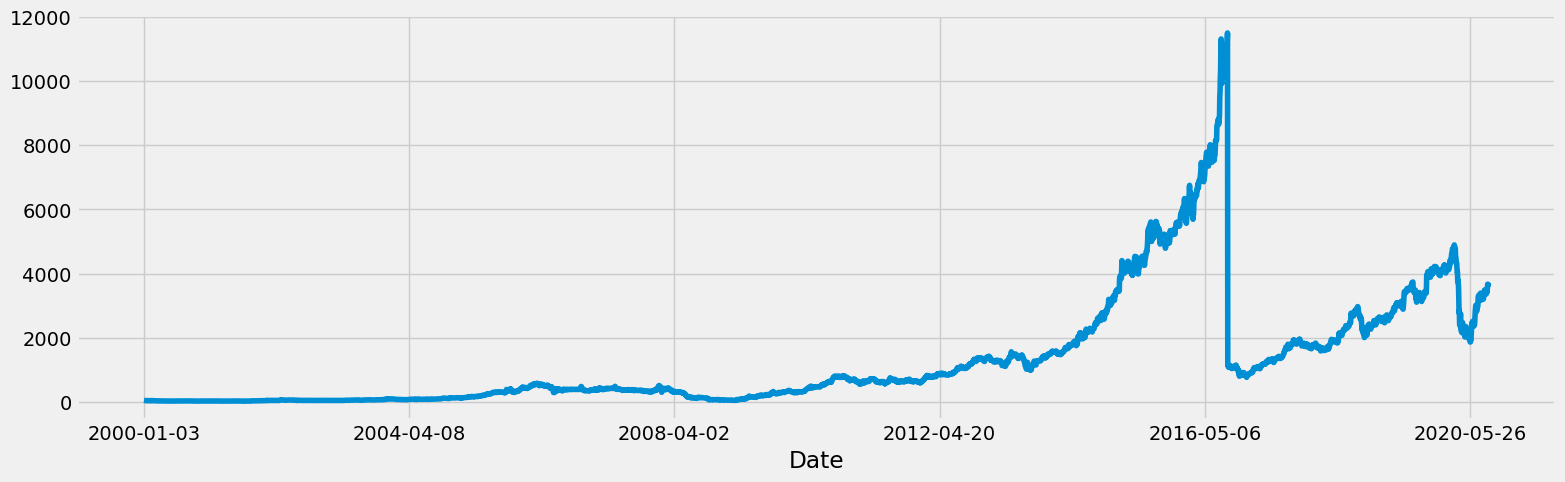

In [5]:
df['VWAP'].plot();

In [6]:
df.shape

(5070, 14)

In [7]:
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
df.shape

(2291, 14)

In [11]:
data=df.copy()

In [12]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [13]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [14]:
lag_features=['High','Low','Volume','Turnover','Trades']

In [15]:
window1=3
window2=7

In [16]:
for feature in lag_features:
    data[feature+'_rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'_rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [17]:
for feature in lag_features:
    data[feature+'_rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'_rolling_std_7']=data[feature].rolling(window=window2).std()

In [18]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_rolling_std_3,High_rolling_std_7,Low_rolling_std_3,Low_rolling_std_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Trades_rolling_std_3,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [19]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'],
      dtype='object')

In [20]:
data.shape

(2291, 34)

In [21]:
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        2
High_rolling_mean_7        6
Low_rolling_mean_3         2
Low_rolling_mean_7         6
Volume_rolling_mean_3      2
Volume_rolling_mean_7      6
Turnover_rolling_mean_3    2
Turnover_rolling_mean_7    6
Trades_rolling_mean_3      2
Trades_rolling_mean_7      6
High_rolling_std_3         2
High_rolling_std_7         6
Low_rolling_std_3          2
Low_rolling_std_7          6
Volume_rolling_std_3       2
Volume_rolling_std_7       6
Turnover_rolling_std_3     2
Turnover_rolling_std_7     6
Trades_rolling_std_3       2
Trades_rolling_std_7       6
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'],
      dtype='object')

In [24]:
ind_features=['High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7']

In [25]:
training_data=data[:1800]
testing_data=data[1800:]

In [26]:
from pmdarima import auto_arima

In [27]:
model=auto_arima(y=training_data['VWAP'],X=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.533, Time=5.83 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.223, Time=1.78 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.346, Time=2.62 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.318, Time=4.83 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=3.53 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.232, Time=4.78 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 28.509 seconds


In [28]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [29]:
import warnings
warnings.filterwarnings('ignore')

forecast=model.predict(n_periods=len(testing_data),X=testing_data[ind_features]).values

In [30]:
forecast[:10]

array([2600.84303428, 2625.24704088, 2601.08741192, 2556.49008969,
       2572.92773961, 2509.21934363, 2223.77318799, 2289.62973637,
       2479.81922384, 2279.36291786])

In [31]:
testing_data['Forecast_ARIMA']=forecast

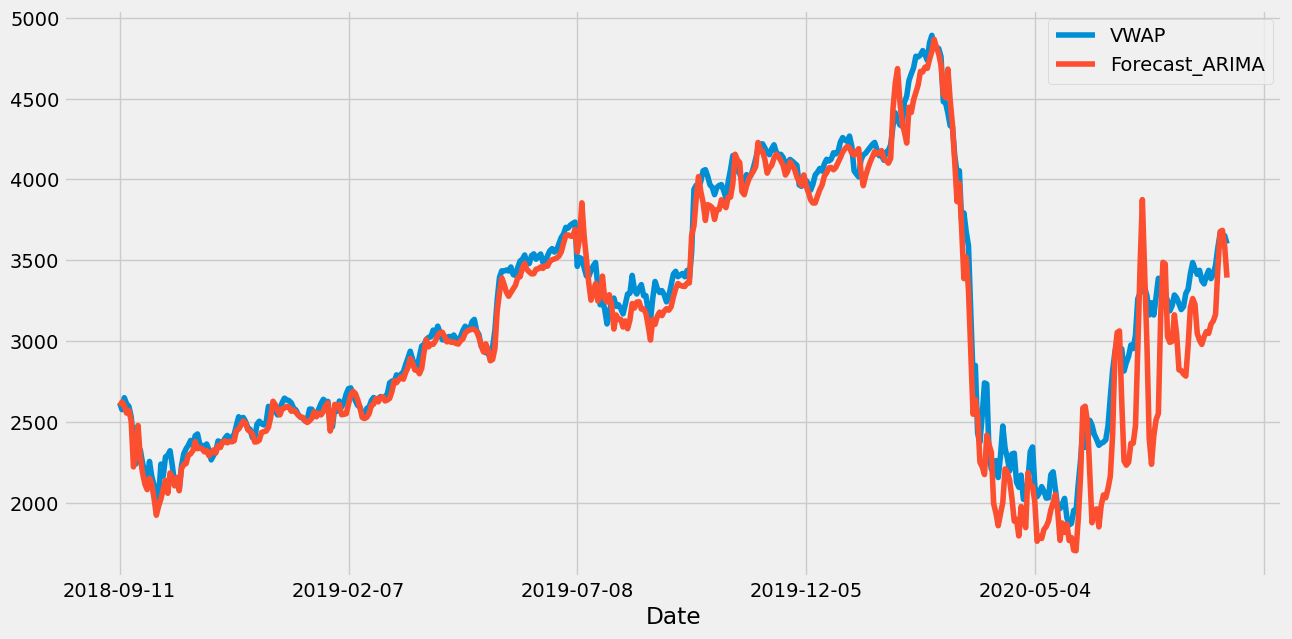

In [32]:
testing_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7));

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mean_absolute_error(testing_data['VWAP'],testing_data['Forecast_ARIMA'])

124.55913902889446

In [35]:
mean_squared_error(testing_data['VWAP'],testing_data['Forecast_ARIMA'])

35206.50017946413

In [36]:
np.sqrt(mean_squared_error(testing_data['VWAP'],testing_data['Forecast_ARIMA']))

187.6339526297523